**`ETL - Proyecto Individual 2 - DA - Accidentes Aereos`**

Librerias utilizadas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Carga del Dataset

In [2]:
df= pd.read_csv('AccidentesAviones.csv', encoding='utf-8')

Quick EDA para un principio de entendimiento de los datos

In [3]:
df.shape

(5008, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5008 non-null   object
 4   OperadOR                5008 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   5007 non-null   object
 7   ac_type                 5008 non-null   object
 8   registration            5008 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

In [5]:
df.head()

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


In [6]:
df.tail()

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
5003,5003,"March 28, 2021",1835,"Near Butte, Alaska",Soloy Helicopters,?,Sightseeing Charter,Eurocopter AS350B3 Ecureuil,N351SH,4598,6,5,1,5,4,1,0,The sightseeing helicopter crashed after missi...
5004,5004,"May 21, 2021",1800,"Near Kaduna, Nigeria",Military - Nigerian Air Force,?,?,Beechcraft B300 King Air 350i,NAF203,FL-891,11,7,4,11,7,4,0,"While on final approach, in poor weather condi..."
5005,5005,"June 10, 2021",0800,"Near Pyin Oo Lwin, Myanmar",Military - Myanmar Air Force,?,Naypyidaw - Anisakan,Beechcraft 1900D,4610,E-325,14,12,2,12,11,1,0,The plane was carrying military personnel and ...
5006,5006,"July 04, 2021",11:30,"Patikul, Sulu, Philippines",Military - Philippine Air Force,?,Cagayan de Oro-Lumbia - Jolo,Lockheed C-130H Hercules,5125,5125,96,88,8,50,?,?,3,"While attempting to land at Jolo Airport, the ..."
5007,5007,"July 06, 2021",1500,"Palana, Russia",Kamchatka Aviation Enterprise,251,Petropavlovsk - Palana,Antonov An 26B-100,RA-26085,12310,28,22,6,28,22,6,0,The passenger plane crashed into the top of a ...


Eliminamos columnas que no son de interes para el analisis de proyecto

In [7]:
df.drop(['Unnamed: 0','flight_no','registration','cn_ln','PASAJEROS A BORDO','crew_aboard','passenger_fatalities','ground'], axis=1,inplace=True)

Damos formato a las columnas de nuestro df

In [8]:
columns_name = ['date','time','location','operator','route','ac_type','aboard','fatalities','crew_fatalities','summary']
df.columns = columns_name

In [9]:
df.replace('?', np.nan, inplace=True)

Limpieza y Tranformacion de columnas

In [10]:
df['date']= pd.to_datetime(df['date'])

In [11]:
df['time'] = pd.to_datetime(df['time'], format='%H%M', errors='coerce')
df['time'] = df['time'].dt.strftime('%H:00')

In [12]:
df['location'] = df['location'].fillna('')

In [13]:
df['aboard'] = df['aboard'].fillna(0).astype(int)
df['fatalities'] = df['fatalities'].fillna(0).astype(int)
df['crew_fatalities'] = df['crew_fatalities'].fillna(0).astype(int)

Búsqueda de Valores Faltantes

In [14]:
df.isnull().sum()

date                  0
time               1721
location              0
operator             10
route               763
ac_type              13
aboard                0
fatalities            0
crew_fatalities       0
summary              59
dtype: int64

In [15]:
clean_df = df
clean_df.to_csv('.\Ac_crashes.csv',index=False)

**`EDA`**

In [16]:
df.describe()

,date,aboard,fatalities,crew_fatalities
count,5008,5008.000000,5008.000000,5008.000000
mean,1971-05-14 09:57:13.226837072,31.015575,22.258387,3.418930
min,1908-09-17 00:00:00,0.000000,0.000000,0.000000
25%,1951-05-07 12:00:00,6.000000,4.000000,1.000000
50%,1970-09-02 12:00:00,16.000000,11.000000,3.000000
75%,1992-03-22 12:00:00,34.250000,25.000000,5.000000
max,2021-07-06 00:00:00,644.000000,583.000000,43.000000
std,NaN,45.438768,34.983747,3.193296


Búsqueda de Registros Duplicados

In [17]:
df.duplicated().sum()

0

Análisis de Correlación entre columnas relevantes numericas

In [18]:
col_corr= ['date','aboard','fatalities','crew_fatalities']
columns_of_interest=df[col_corr]

correlation_matrix = columns_of_interest.corr()
correlation_matrix

,date,aboard,fatalities,crew_fatalities
date,1.000000,0.213434,0.163104,0.073312
aboard,0.213434,1.000000,0.739870,0.315878
fatalities,0.163104,0.739870,1.000000,0.559275
crew_fatalities,0.073312,0.315878,0.559275,1.000000


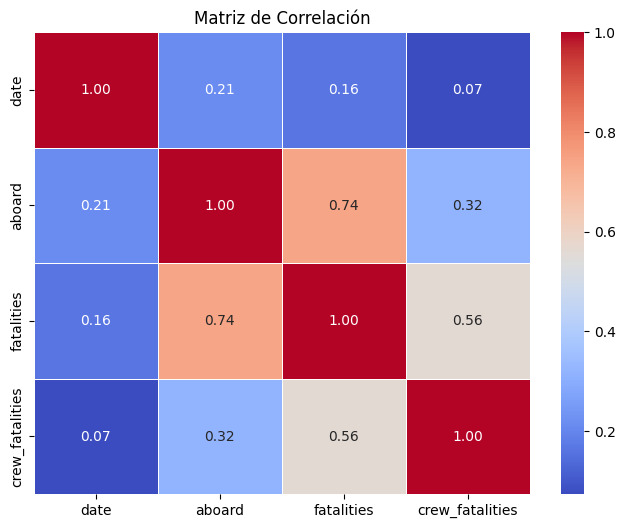

In [19]:
plt.figure(figsize=(8, 6))  # Ajusta el tamaño del gráfico según tus preferencias
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

**Correlación con la fecha**: Observé que la correlación entre la fecha y las otras variables es bastante baja. Esto es lógico, ya que la fecha generalmente no se relaciona de manera significativa con estas variables numéricas.

**Relación entre 'aboard', 'fatalities' y 'crew_fatalities'**: Noté una correlación positiva notable entre las variables 'aboard', 'fatalities' y 'crew_fatalities'. En otras palabras, cuando el número de personas a bordo aumenta, también tiende a aumentar el número de fatalidades y fatalidades de la tripulación. Esto tiene sentido, ya que un mayor número de pasajeros podría aumentar la probabilidad de fatalidades en caso de un accidente.

**Relación entre 'fatalities' y 'crew_fatalities'**: También identifiqué una correlación positiva significativa entre las variables 'fatalities' y 'crew_fatalities'. Esto sugiere que un aumento en el número de fatalidades tiende a estar asociado con un aumento en el número de fatalidades de la tripulación. Esta asociación es coherente con la idea de que las fatalidades de la tripulación a menudo están relacionadas con las fatalidades generales en un accidente aéreo.

**`Análisis Gráfico`**

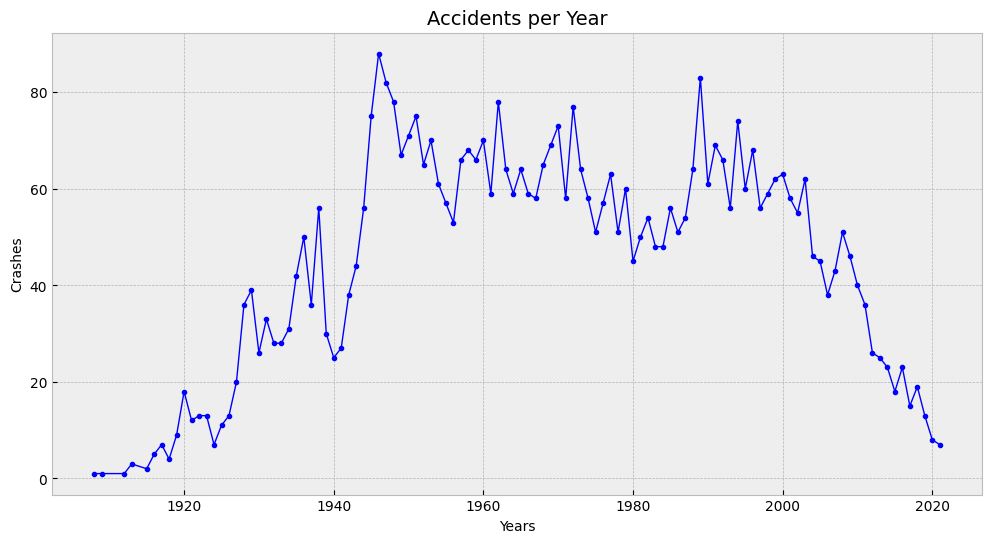

In [20]:
accidents_per_year = df['date'].dt.year.value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.style.use('bmh')
plt.plot(accidents_per_year.index, accidents_per_year.values, color='blue', marker='.', linewidth=1)

plt.xlabel('Years', fontsize=10)
plt.ylabel('Crashes', fontsize=10)
plt.title('Accidents per Year', loc='Center', fontsize=14)

plt.show()

**Conclusión**: Se observan 3 puntos de inflexión notorios a lo largo de los años.
    Primero, el período de la WW2 (1946), en el que los accidentes aéreos aumentaron notablemente y descendieron al término de la misma.
    Luego, en una etapa de globalización mundial, en cuanto a la masividad de rutas aéreas (1985-1990).
    Y por último, el año 2001 marcó un notable descenso de accidentes por año, debido a grandes cambios en prevención y seguridad aeroportuaria por obvias razones.

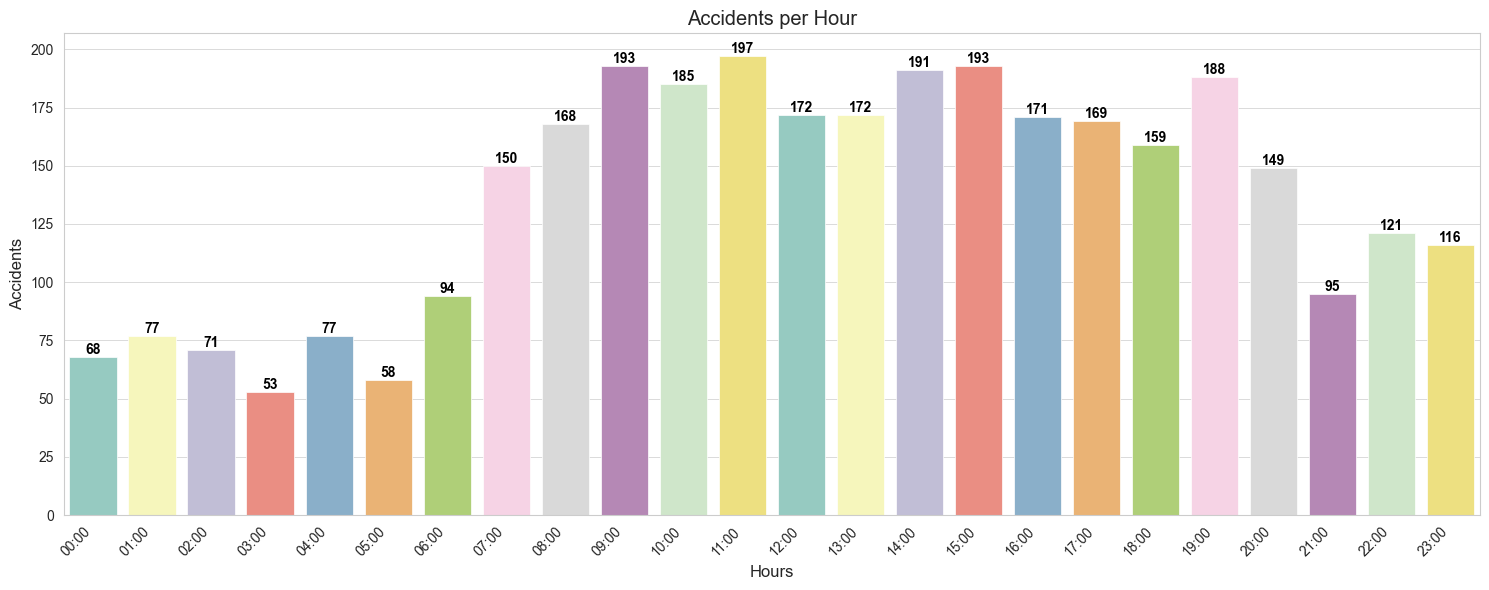

In [21]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 6))
ordered_hours = [f'{hour:02d}:00' for hour in range(24)]
ax = sns.countplot(data=df, x='time', palette='Set3', order=ordered_hours)
ax.set_xlabel('Hours')
ax.set_ylabel('Accidents')
ax.set_title('Accidents per Hour')

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

**Conclusion**: Podemos interpretar gracias a la grafica, lo poco probable que son los accidentes en los horarios nocturnos.

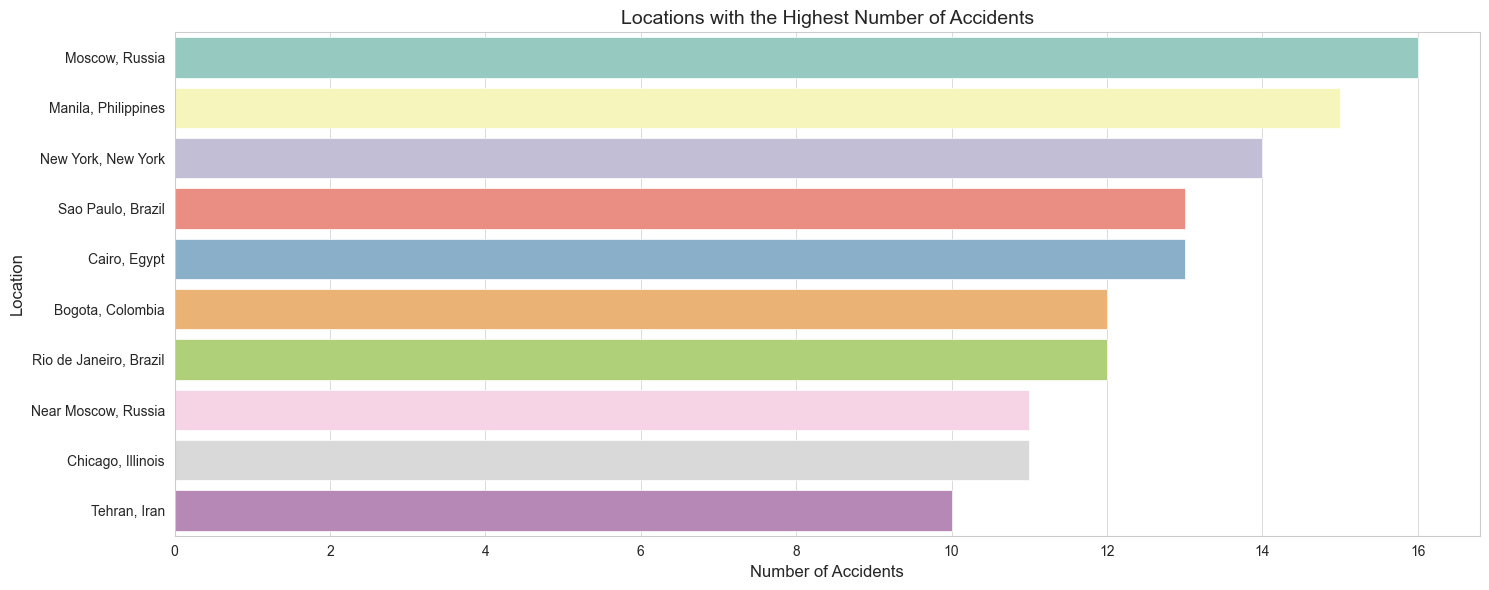

In [22]:
accidents_by_location = df['location'].value_counts().reset_index()
accidents_by_location.columns = ['Location', 'Accidents']

accidents_by_location = accidents_by_location.sort_values(by='Accidents', ascending=False)

sns.set_style("whitegrid")

plt.figure(figsize=(15, 6))
ax = sns.barplot(data=accidents_by_location.head(10), x='Accidents', y='Location', palette='Set3')

ax.set_xlabel('Number of Accidents')
ax.set_ylabel('Location')
ax.set_title('Locations with the Highest Number of Accidents', fontsize=14)

plt.tight_layout()
plt.show()

**Conclusion**: Rusia abarca la gran mayoria de Resgistros de Accidentes en este Top 10 de locaciones, debido a su aerolinea de bandera 'Aeroflot', la cual es la mas importante a nivel pais, que ha tenido un gran número de accidentes fatales, la mayoría durante la era soviética.

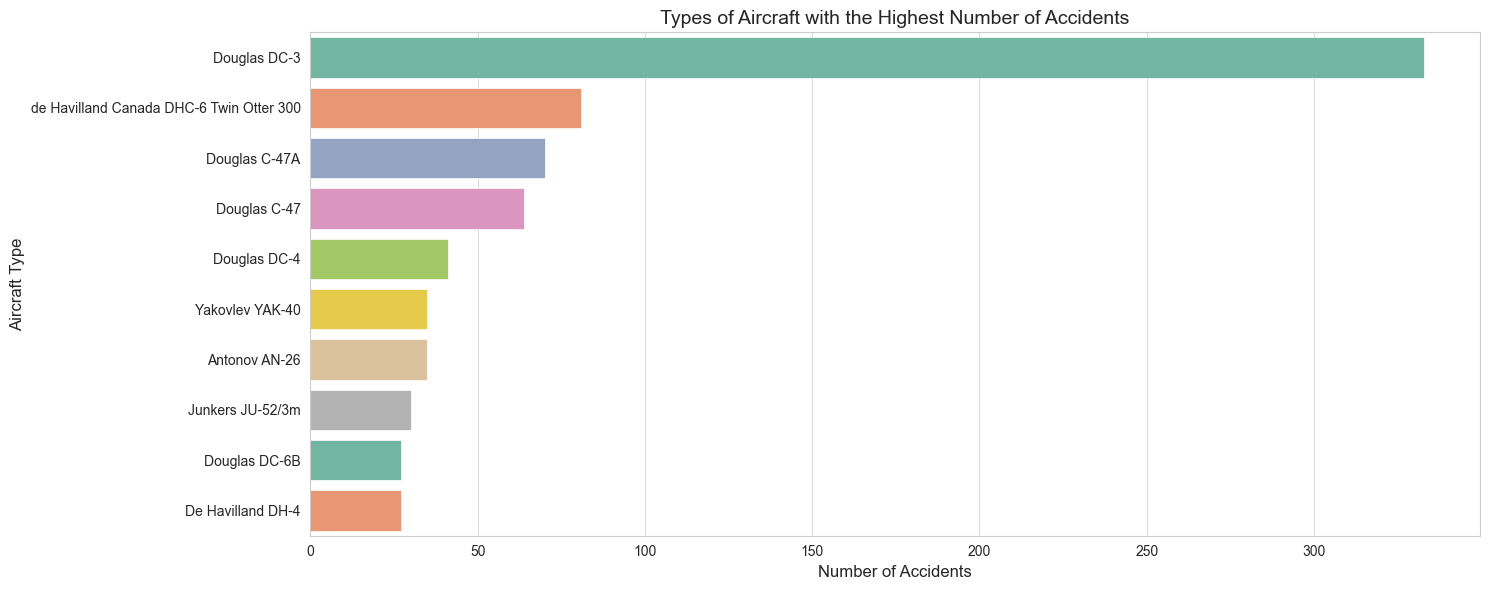

In [23]:
accidents_by_ac_type = df['ac_type'].value_counts().reset_index()
accidents_by_ac_type.columns = ['Aircraft Type', 'Accidents']

accidents_by_ac_type = accidents_by_ac_type.sort_values(by='Accidents', ascending=False)

sns.set_style("whitegrid")

plt.figure(figsize=(15, 6))
ax = sns.barplot(data=accidents_by_ac_type.head(10), x='Accidents', y='Aircraft Type', palette='Set2')

ax.set_xlabel('Number of Accidents')
ax.set_ylabel('Aircraft Type')
ax.set_title('Types of Aircraft with the Highest Number of Accidents', fontsize=14)

plt.tight_layout()
plt.show()

El **Douglas DC-3** fue un avión revolucionario en el transporte de pasajeros en los 30 y 40 del siglo XX. Con importante presencia durante la WW2.

**`KPI's`**

Evaluar la disminución de un 10% la tasa de fatalidad de la tripulación en los últimos 10 años, comparado a la década anterior

In [24]:
# Filtro los datos para las dos décadas
last_decade_data = df[df['date'].dt.year.between(2011, 2020)]
previous_decade_data = df[df['date'].dt.year.between(2001, 2010)]

# Calculo la suma total de fallecidos en la tripulación y la suma total de accidentes en cada década
fatalities_last_decade = last_decade_data['crew_fatalities'].sum()
accidents_last_decade = last_decade_data.shape[0]

fatalities_previous_decade = previous_decade_data['crew_fatalities'].sum()
accidents_previous_decade = previous_decade_data.shape[0]

# Calculo la tasa de fatalidad de la tripulación para cada década
fatality_rate_last_decade = fatalities_last_decade / accidents_last_decade
fatality_rate_previous_decade = fatalities_previous_decade / accidents_previous_decade

# Evalúo si hay una disminución del 10% en la última década en comparación con la década anterior
if (fatality_rate_previous_decade - fatality_rate_last_decade) / fatality_rate_previous_decade >= 0.10:
    print("Hubo una disminución del 10% o más en la tasa de fatalidad de la tripulación en la última década.")
else:
    print("No hubo una disminución del 10% en la tasa de fatalidad de la tripulación en la última década.")


No hubo una disminución del 10% en la tasa de fatalidad de la tripulación en la última década.


In [25]:
print(f'La tasa de fatalidad de la tripulación en la ultima decada fue de {round(fatality_rate_last_decade,2)}%')
print(f'La tasa de fatalidad de la tripulación en la década anterior fue de {round(fatality_rate_previous_decade,2)}%')

La tasa de fatalidad de la tripulación en la ultima decada fue de 3.68%
La tasa de fatalidad de la tripulación en la década anterior fue de 3.24%
